In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import csv
import os
from pathlib import Path

In [3]:
coffee_qlty_df = pd.read_csv("Coffee_qlty.csv")
coffee_qlty_df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'Coffee_qlty.csv'

In [24]:
quality_columns = [
    "AVG_Aroma", "AVG_Flavor", "AVG_Aftertaste", "AVG_Acidity",
    "AVG_Body", "AVG_Balance", "AVG_Sweetness", "AVG_Moisture"
]
quality_columns

['AVG_Aroma',
 'AVG_Flavor',
 'AVG_Aftertaste',
 'AVG_Acidity',
 'AVG_Body',
 'AVG_Balance',
 'AVG_Sweetness',
 'AVG_Moisture']

In [22]:
coffee_qlty_df["Overall_Quality"] = coffee_qlty_df[quality_columns].mean(axis=1)
coffee_qlty_df

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt,Overall_Quality
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132,6.898305
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2,6.788125
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16,6.932734
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183,6.958436
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51,6.935441
5,Cote dIvoire,7.420000,7.250000,6.830000,7.000000,7.330000,7.080000,9.330000,10.000000,10.000000,0.130000,0.000000,1.000000,2.000000,1,6.630000
6,Ecuador,7.583333,7.640000,7.553333,7.693333,6.026667,6.970000,10.000000,10.000000,8.723333,0.030000,0.000000,0.000000,0.333333,3,6.527500
7,El Salvador,7.674762,7.654286,7.567143,7.590476,7.606667,7.711429,9.936190,9.936190,9.808571,0.045714,0.095238,0.142857,3.571429,21,6.957381
8,Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,0.082955,0.363636,0.250000,5.159091,44,7.210710
9,Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,0.102265,0.276243,0.187845,3.419890,181,6.851989


In [26]:
top_countries = coffee_qlty_df.nlargest(5, "Overall_Quality")[["Country.of.Origin", "Overall_Quality"]]
top_countries

,Country.of.Origin,Overall_Quality
23,Papua New Guinea,7.41000
8,Ethiopia,7.21071
15,Kenya,7.09105
14,Japan,7.08750
26,Rwanda,7.03375


In [28]:
# Data for visualization
countries = top_countries["Country.of.Origin"].tolist()
quality_scores = top_countries["Overall_Quality"].tolist()

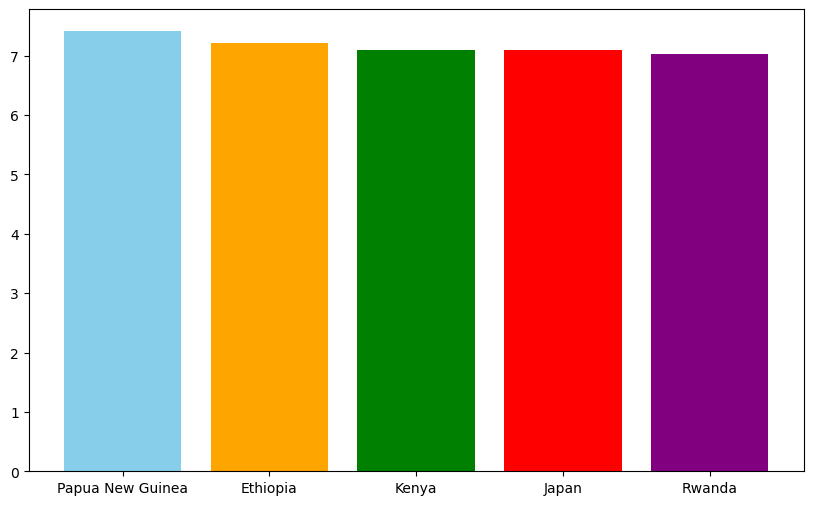

In [30]:
plt.figure(figsize=(10, 6))
bars = plt.bar(countries, quality_scores, color=['skyblue', 'orange', 'green', 'red', 'purple'])

Text(0, 0.5, 'Overall Quality Score')

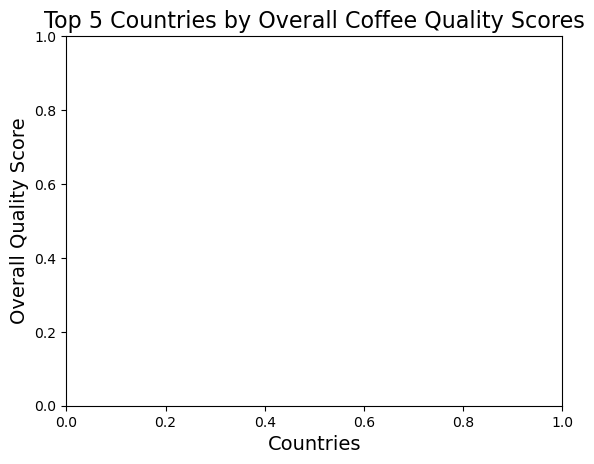

In [32]:
# Add chart title and axis labels
plt.title('Top 5 Countries by Overall Coffee Quality Scores', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Overall Quality Score', fontsize=14)

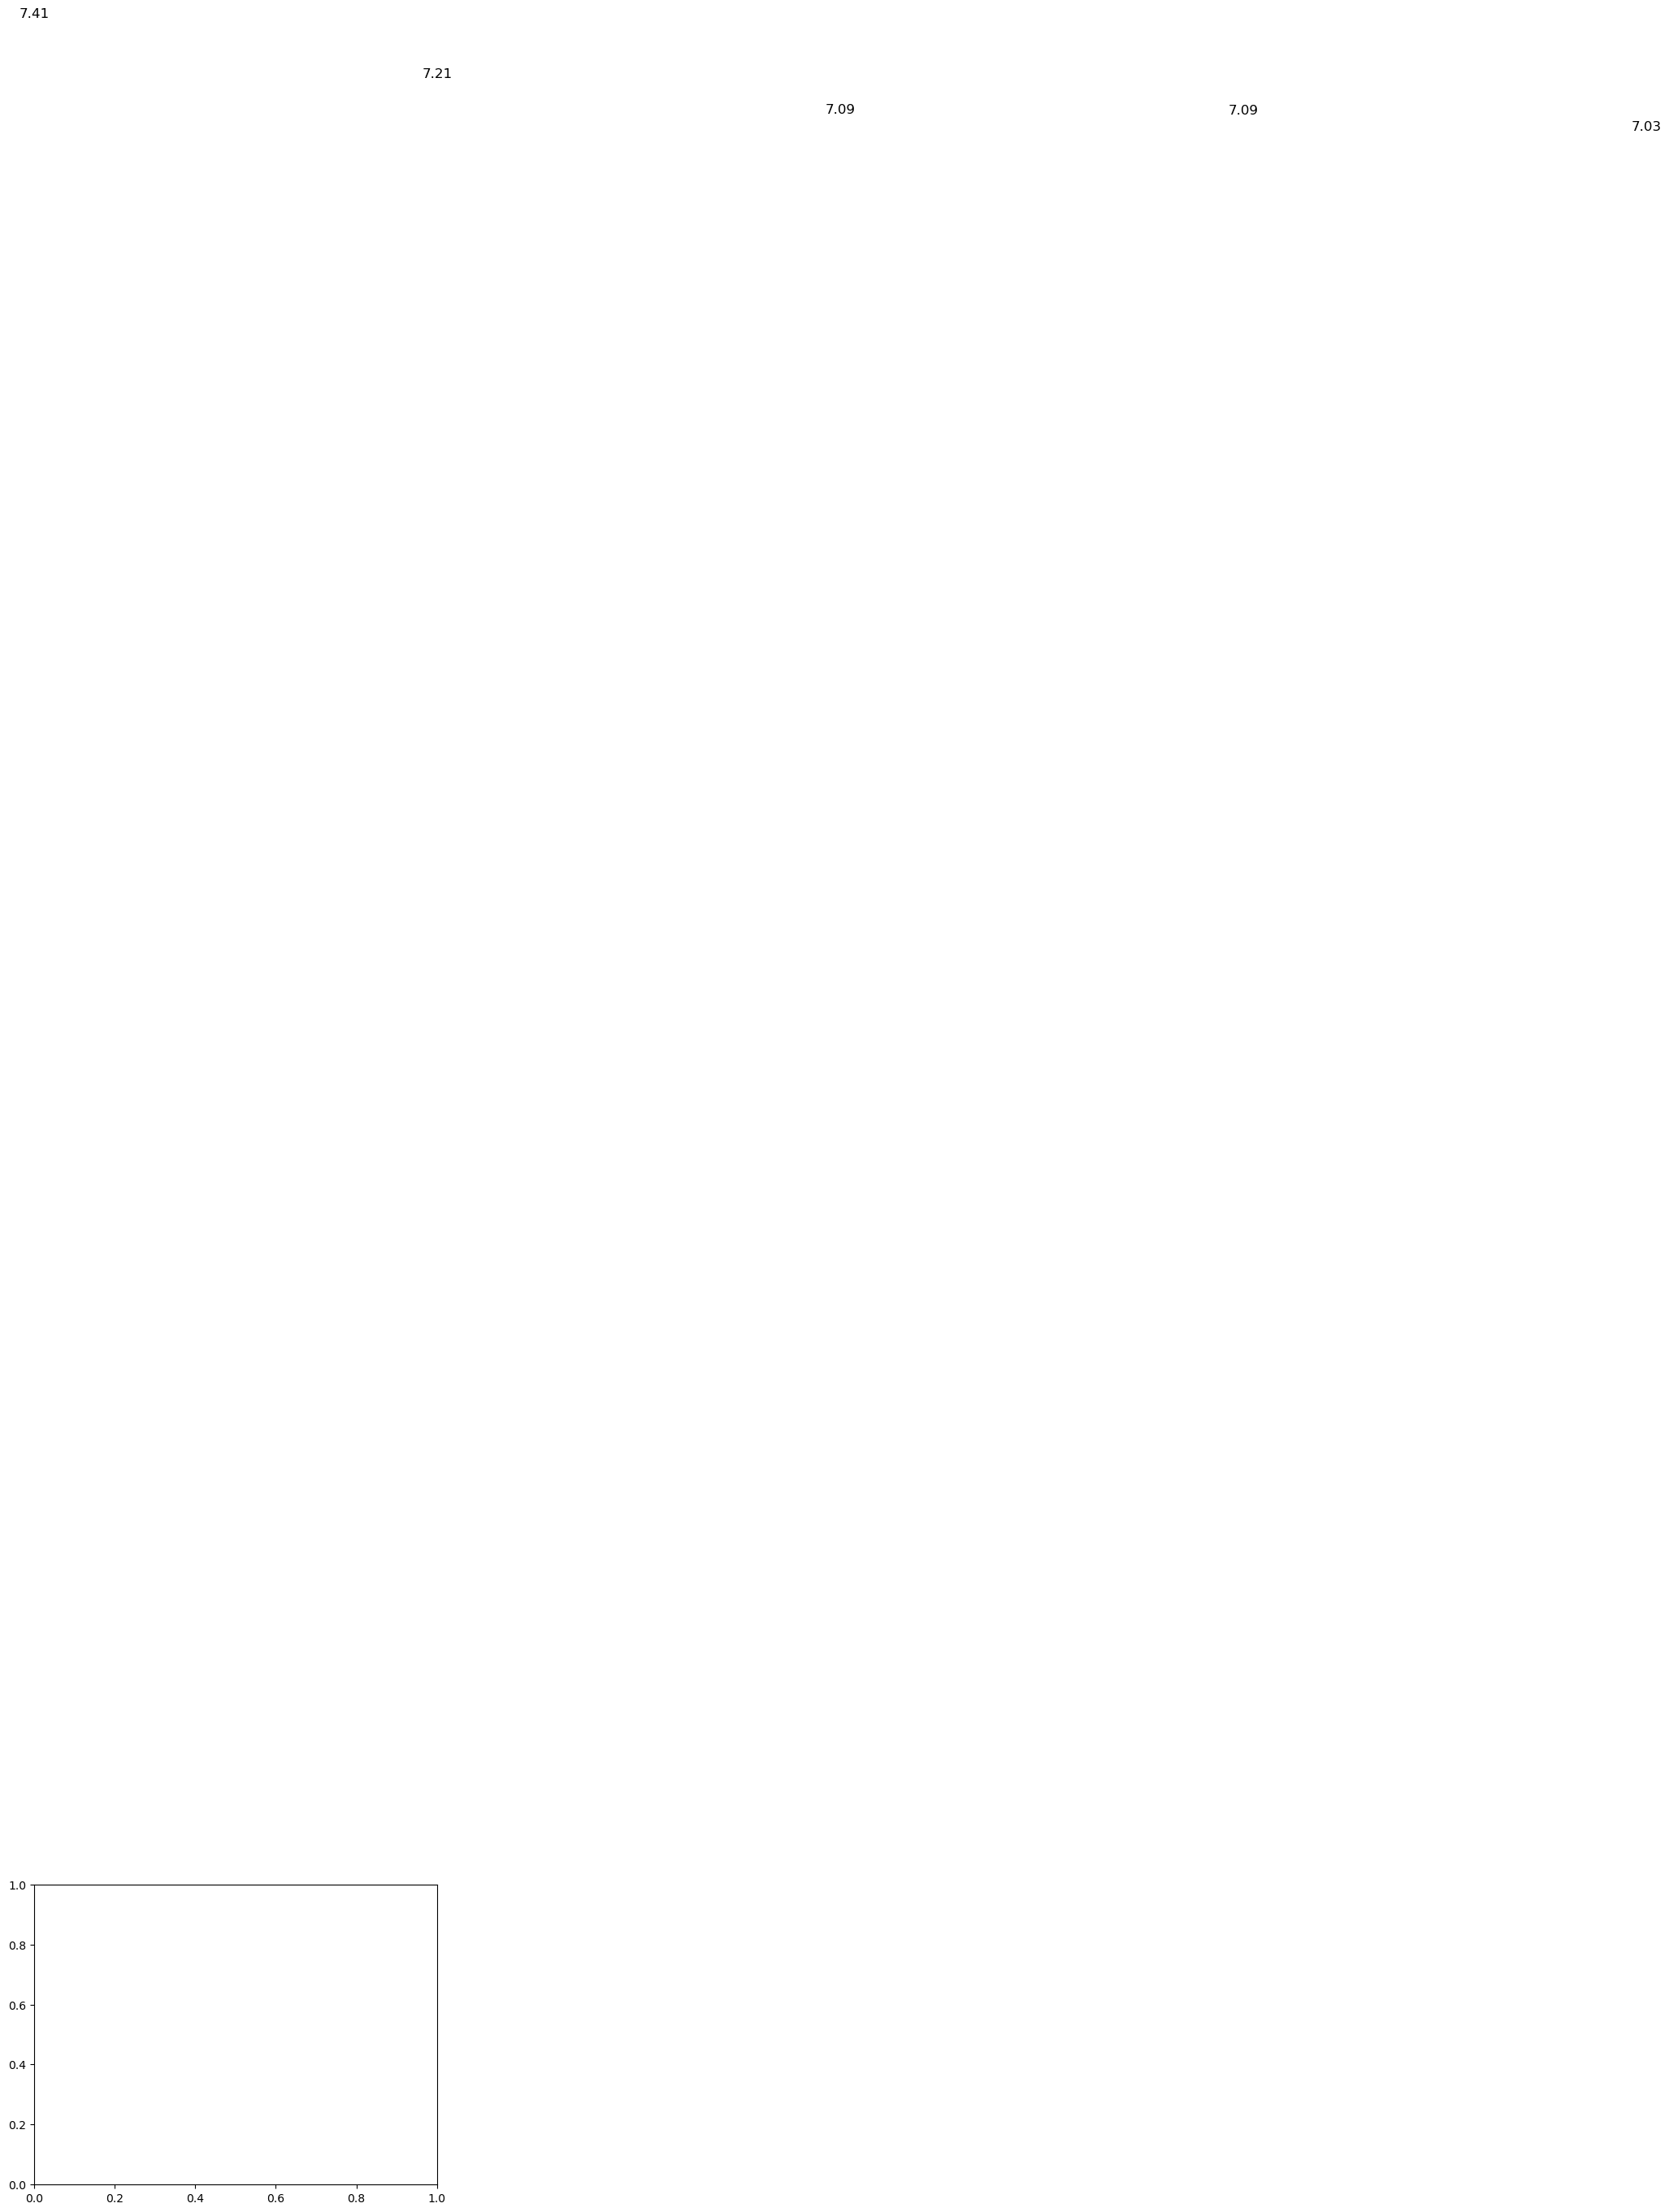

In [34]:
# Annotate bars with their scores
for bar, score in zip(bars, quality_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, f'{score:.2f}', 
             ha='center', va='bottom', fontsize=12, color='black')


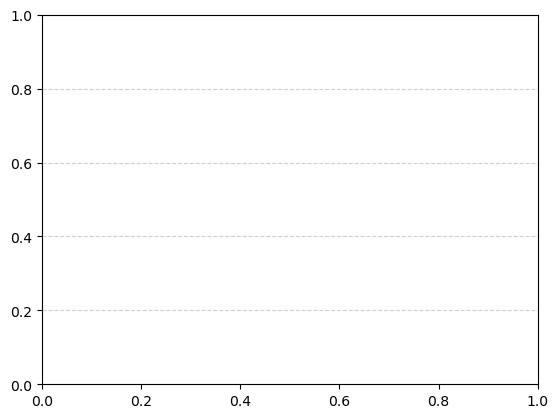

In [36]:
# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()